<a href="https://colab.research.google.com/github/jnelly79/Centurylink_interview_project/blob/master/centurylink_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Centurylink Interview Project
**FIFA EDA, OLS, Decision Tree Analysis**

Content


1.   Exploratory Data Analysis
2.   Ordinary Least Squares Model
3.   Decision Tree Model







# 1. Exploratory Data Analysis

The libraries I will be using for this analysis are as follows...


*   Pandas - A Python library used to manage and manipulate data in dataframes.
*   Numpy - A Python library used to manipulate data into vectors/arrays.
*   Seabborn - A Python library used to visualize data.
*   PyPlot - A Python library used to visualize data.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True) # sets the color codes for seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First step in my EDA is to load the data into a pandas dataframe and then to view the head to see what it looks like.

In [2]:
df = pd.read_excel("/content/drive/My Drive/Centurylink_project/FIFAData_90_percent.xlsx")
df.head()

,sofifa_id,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,101317,37,1982-04-16,189,85,Germany,SC Paderborn 07,63,63,40000,2000,Right,1,3,1,Medium/Medium,Normal,No,72000,RES,2017-01-19,2020.0,0,0,0,0,0,0,NaN,15,12,20,24,12,13,14,11,23,22,40,47,38,66,31,26,64,30,71,13,37,16,14,28,22,40,16,11,11
1,101488,35,1983-08-01,188,84,Germany,FC Erzgebirge Aue,64,64,120000,1000,Right,1,3,1,Medium/Medium,Stocky,No,186000,RES,2016-10-11,2020.0,0,0,0,0,0,0,NaN,14,11,14,23,10,15,11,12,22,19,33,35,33,66,34,41,76,42,74,9,40,16,9,17,22,57,11,14,15
2,102064,35,1984-06-19,180,69,Italy,Spezia,72,72,950000,3000,Right,1,3,2,Medium/High,Lean,No,1500000,RCB,2015-08-13,2020.0,51,41,45,51,71,77,Avoids Using Weaker Foot,43,29,70,50,42,44,40,28,52,58,42,59,47,69,77,59,86,77,77,48,75,72,26,39,61,71,71,72,71
3,102593,36,1982-12-22,175,68,England,Exeter City,62,62,60000,2000,Left,1,3,2,Medium/Medium,Normal,No,105000,LB,2012-07-01,2020.0,58,44,59,59,60,68,Leadership,60,34,56,60,51,57,59,58,58,59,61,55,64,61,71,57,78,74,66,50,63,59,55,59,40,62,60,61,59
4,102881,39,1979-08-28,188,80,Canada,AIK,57,57,10000,1000,Left,1,2,1,Medium/Medium,Normal,No,13000,SUB,2011-01-01,2020.0,0,0,0,0,0,0,Acrobatic Clearance,17,12,14,36,9,12,9,9,22,24,30,35,34,64,63,41,49,40,72,16,22,21,17,35,16,44,12,9,10


So far from just looking at the head the data looks alright with only two NaNs. To get a closer look I will call the shape and info functions for the dataframe.

In [3]:
df.shape

(15854, 58)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   sofifa_id                   15854 non-null  int64         
 1   age                         15854 non-null  int64         
 2   dob                         15854 non-null  datetime64[ns]
 3   height_cm                   15854 non-null  int64         
 4   weight_kg                   15854 non-null  int64         
 5   nationality                 15854 non-null  object        
 6   club                        15854 non-null  object        
 7   overall                     15854 non-null  int64         
 8   potential                   15854 non-null  int64         
 9   value_eur                   15854 non-null  int64         
 10  wage_eur                    15854 non-null  int64         
 11  preferred_foot              15854 non-null  object    

There are 58 features with 15,854 samples of data with 47 of them being of int64 data type, 9 of them an object data type, and one feature is a float64 data type. The two features that stand out is "team_position", "joined", "contract_valid_until", "player_traits". Both of these features have a lesser count of samples than the total population of that shape. 

Looking back at the df.head() the "joined" feature would indicate when the player joined, and the "player_traits" feature appears to be categorical traits of the player's greatest attributes. I will use df.isnull() to verify the null values if any for either.

In [5]:
print(df.isnull().sum())

sofifa_id                        0
age                              0
dob                              0
height_cm                        0
weight_kg                        0
nationality                      0
club                             0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
body_type                        0
real_face                        0
release_clause_eur               0
team_position                  213
joined                        1110
contract_valid_until           213
pace                             0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
player_traits       

It would appear that the features "team_position" and "contract_valid_until" would be correlated with one another given they have 213 values each. When I apply a filter to even one of the features and reveal the blank values. The question I have would be what do the values of these player's contracts and entry dates into fifa have to do with their stats, but their positions might have something to add to them.

Based on the choices given, I have decided to compare Japan's players to the rest of all the other players. What I decided to compare is the player's "overall" feature of Japan's players and how they stack up against the other players. I will use a basic statistics analysis to show this.

In [6]:
dfjapan = df.loc[df['nationality'] == "Japan"] # creates a dataframe for only players that contain the value Japan in the feature "nationality".

In [7]:
dfjapan.head()

,sofifa_id,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
121,140181,39,1979-08-02,187,80,Japan,Kashima Antlers,66,66,70000,1000,Right,1,3,1,Medium/Medium,Normal,No,88000,SUB,1998-01-01,2022.0,0,0,0,0,0,0,"Avoids Using Weaker Foot, Giant Throw-in, Acro...",13,12,18,26,18,14,10,11,33,16,17,19,28,52,32,49,52,37,51,15,21,12,10,45,12,20,17,12,13
122,140196,39,1980-01-28,178,75,Japan,Gamba Osaka,72,72,775000,7000,Right,3,3,3,High/Medium,Normal,Yes,969000,CDM,2001-01-02,2022.0,31,70,77,68,66,67,"Finesse Shot, Giant Throw-in",78,67,60,75,64,67,82,86,74,71,30,31,63,70,58,75,64,60,72,71,65,68,68,77,82,82,66,68,66
123,140201,37,1982-06-09,170,73,Japan,JÃºbilo Iwata,69,69,375000,3000,Right,2,4,3,Medium/Medium,Lean,No,469000,SUB,2018-07-01,2020.0,41,71,63,70,25,60,Crowd Favourite,53,70,67,68,72,68,70,67,60,72,40,42,75,62,74,74,36,53,67,69,59,13,77,65,77,67,29,20,14
284,156478,37,1981-09-06,178,77,Japan,Urawa Red Diamonds,65,65,110000,2000,Right,1,3,2,Low/Medium,Normal,No,143000,SUB,2012-01-01,2023.0,38,66,70,63,66,57,"Diver, Avoids Using Weaker Foot, Argues with O...",68,66,62,73,69,60,72,71,69,72,45,32,58,59,58,65,53,33,68,72,61,71,47,67,70,75,69,63,57
378,162388,34,1985-06-21,183,77,Japan,Nagoya Grampus,64,64,170000,2000,Right,1,4,2,Medium/High,Normal,No,213000,SUB,2019-01-05,2021.0,45,36,50,50,61,66,Injury Prone,41,31,74,63,35,41,39,36,46,59,50,41,66,50,54,42,78,50,71,35,69,60,54,47,37,68,60,60,57


In [8]:
dfall = df[df.nationality != "Japan"] # This removes all samples that contain the value "Japan" in the feature "nationality".

In [9]:
dfjapan['overall'].describe()

count    398.000000
mean      63.658291
std        5.482173
min       48.000000
25%       60.000000
50%       64.000000
75%       67.000000
max       80.000000
Name: overall, dtype: float64

In [10]:
dfall['overall'].describe()

count    15456.000000
mean        66.161426
std          6.962767
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

It would appear that Japan's players average out at having an overall score of 63 .66 while the rest of the world's players average out at 66.16. Given this data if I was to play the game Fifa right now I wouldn't choose Japan based off their "overall" stats. I want to visualize the distribution of this though in a histogram for both though.

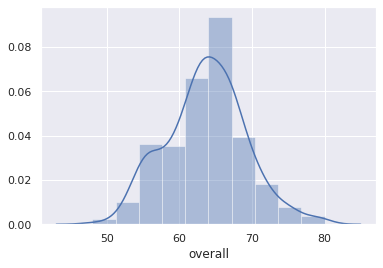

In [11]:
sns.distplot(dfjapan['overall'], bins=10) # distribution visualization for Japan player's "overall" stats.

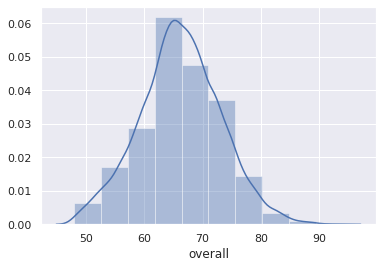

In [12]:
sns.distplot(dfall['overall'], bins=10) # disgtribution plot for all player's (excluding Japan) overall stats.

Interesting enough Japan has a higher looking distribution between 60 and 70 leaning closerto 70 than the rest of the world does which might cause me to rethink my strategy on picking my teams. Let me get them side by side though.

Text(0.5, 1.0, 'Side-by-Side Histogram Japan Player stats vs All player stats')

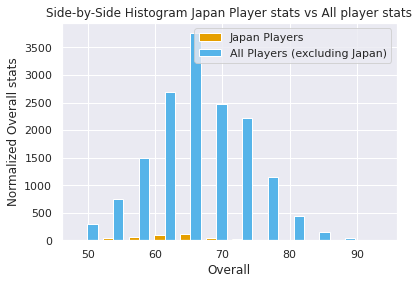

In [13]:
x1 = dfjapan['overall'].tolist() # places all "overall" stat values for Japan players into a list.
x2 = dfall['overall'].tolist() # places all "overall" stat values for all players( excluding Japan) into a list.

colors = ['#E69F00', '#56B4E9'] # Colors orange and blue.
names = ['Japan Players', 'All Players (excluding Japan)']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Overall')
plt.ylabel('Normalized Overall stats')
plt.title('Side-by-Side Histogram Japan Player stats vs All player stats')

Obviously the distribution is too small to see for Japan players, but this distribution shows that Japan has a higher frequency of players with overall stats next to the highest frequency of values with the rest of the players of the world. However, I will do a value_counts() to determine how many players Japan has between 60 and 70 for their feature  in "overall" stats.

In [14]:
ranges = [60,70]
japan_range = dfjapan['overall']
japan_range.groupby(pd.cut(dfjapan.overall,ranges)).count()

overall
(60, 70]    253
Name: overall, dtype: int64

In [15]:
dfjapan.shape

(398, 58)

In [16]:
dfjapan['overall'].value_counts(sort=False)

48     1
51     2
53     8
54     5
55    20
56    15
57    11
58    11
59    14
60    20
61    18
62    29
63    37
64    32
65    25
66    32
67    30
68    22
69    16
70    12
71    10
72     7
73     6
74     1
75     6
76     3
78     1
79     3
80     1
Name: overall, dtype: int64

In [17]:
all_range = dfall['overall']
all_range.groupby(pd.cut(dfall.overall,ranges)).count()

overall
(60, 70]    8311
Name: overall, dtype: int64

In [18]:
dfall.shape

(15456, 58)

With 253 players out of 398 total from Japan's Fifa game team falling between 60 and 70 on overall stats Japan has 63.57% of their players competing at those overall stat levels vs the 8311 out of 15456 players from the rest of the world leaving 53.77% of those players competing with those overall stats at those ranges.

# 2. Ordinary Least Squares Model

For the OLS model since ethe target variable is "overall", I think it will be a good idea to visualize correlation in order to see what variables might be correlated to that feature. Before I do that I will do just a regular pandas.cor function call with relevant features above .5.

In [19]:
df_cor = df.corr()['overall']# Get correlation with overall feature.

relevant_features_pos = df_cor[df_cor>0.5]# Selecting highly correlated features with "overall" and display.
relevant_features_pos

overall                    1.000000
potential                  0.638494
value_eur                  0.635413
wage_eur                   0.572631
release_clause_eur         0.605457
attacking_short_passing    0.599373
skill_long_passing         0.557882
skill_ball_control         0.562244
movement_reactions         0.865415
power_shot_power           0.589507
mentality_vision           0.539806
mentality_composure        0.759325
Name: overall, dtype: float64

This gives a general idea for me on what variables I should use for the OLS model to predict the target feature "overall". I want to see what inverse correlations there might be out there also though so I will now visualize to get a general look at significant correlated variables greater than .5.

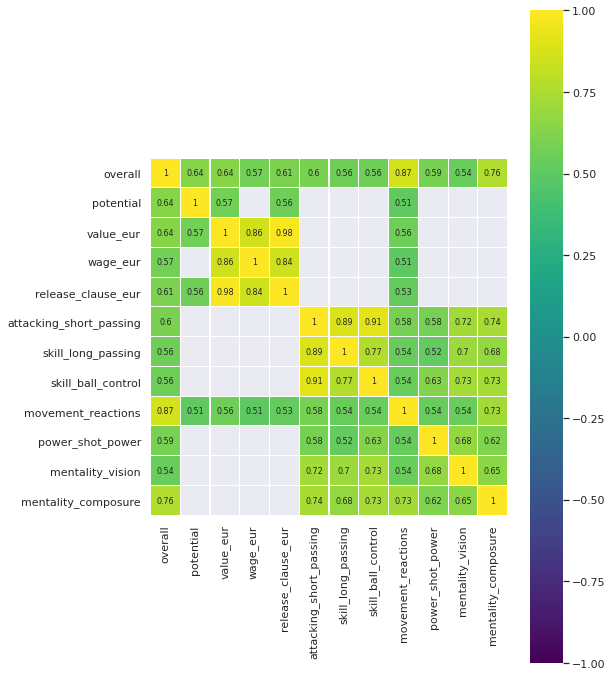

In [20]:
# Display significant correlation in plot heatmap
corr = df[['overall', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
           'attacking_short_passing', 'skill_long_passing', 'skill_ball_control',
           'movement_reactions', 'power_shot_power', 'mentality_vision',
           'mentality_composure']].corr()
plt.figure(figsize=(8, 12))
sns.heatmap(corr[(corr >= 0.5) ],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size":8}, square=True);

I have a feeling my predictor features will be "movement_reactions", "attacking_short_passing", "value_eur", and "potential". To be sure there is no multicollinearity between them I will run VIF to figure this out.

I will also do a chi-square test for feature importance also.

In [21]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
df_X =  df[['potential', 'value_eur', 'wage_eur', 'release_clause_eur',
           'attacking_short_passing', 'skill_long_passing', 'skill_ball_control',
           'movement_reactions', 'power_shot_power', 'mentality_vision',
           'mentality_composure']]
df_y = df['overall']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df_X,df_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                      Specs         Score
3        release_clause_eur  3.510898e+11
1                 value_eur  1.782745e+11
2                  wage_eur  5.972576e+08
10      mentality_composure  2.146199e+04
6        skill_ball_control  2.002484e+04
5        skill_long_passing  1.977933e+04
4   attacking_short_passing  1.788341e+04
8          power_shot_power  1.730032e+04
9          mentality_vision  1.637280e+04
7        movement_reactions  1.615469e+04


This chi2 test indicates that the most important feature is "wage_eur". However I am still going to be using the feature "movement_reactions" as my most important feature due to its high correlation.

Now onto the VIF test for multicollinearity.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

df_multi =  df[['potential', 'value_eur', 'wage_eur', 'release_clause_eur',
           'attacking_short_passing', 'skill_long_passing', 'skill_ball_control',
           'movement_reactions', 'power_shot_power', 'mentality_vision',
           'mentality_composure']]
calc_vif(df_multi)

,variables,VIF
0,potential,70.601405
1,value_eur,31.996605
2,wage_eur,4.599042
3,release_clause_eur,28.494699
4,attacking_short_passing,234.500044
5,skill_long_passing,75.748387
6,skill_ball_control,113.548277
7,movement_reactions,113.099499
8,power_shot_power,42.682411
9,mentality_vision,47.416040


The idea behind a VIF test is to find the features giving the highest VIF score and eliminate them as predictor features for the OLS model because of the high multicollinearity. So I will eliminate all the ones I wasn't conerned about anyways and then test.

In [23]:
df_multi1 =  df[['potential', 'wage_eur',
           'attacking_short_passing',
           'movement_reactions']]
calc_vif(df_multi1)

,variables,VIF
0,potential,67.992850
1,wage_eur,1.353067
2,attacking_short_passing,31.197206
3,movement_reactions,84.036146


So the removal of all those other variables did decrease the VIF scores of my main predictor feature as well as the others, but there still may be high multicollinearity for this model. However, I am curious to see how they perform regardless.

Before I go create the model I will go explore "movement_reactions" and "mentality_composure" features a little more closely to see if they need to be cleaned up a bit so that they are properly engineered for the model, but looking back at the EDA I did in the beginning these two don’t have any missing values so I think the only question would be to see if there are any outliers and for this I will do a regular side by side boxplot of the two just to visually see quickly if there are any. 

In [24]:
df_over_move_at_po_wa = df[['sofifa_id','overall','potential', 'wage_eur',
           'attacking_short_passing',
           'movement_reactions']]
df_over_move_at_po_wa = df_over_move_at_po_wa.set_index('sofifa_id')
df_over_move_at_po_wa.head()

,overall,potential,wage_eur,attacking_short_passing,movement_reactions
sofifa_id,,,,,
101317,63,63,2000,24,66
101488,64,64,1000,23,66
102064,72,72,3000,50,69
102593,62,62,2000,60,61
102881,57,57,1000,36,64


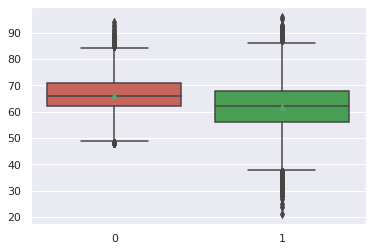

In [25]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], 
          df_over_move_at_po_wa['movement_reactions'],
          ],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

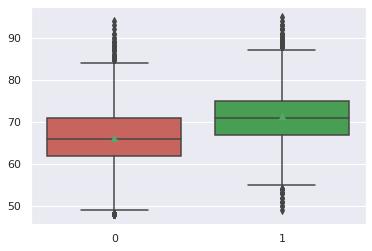

In [26]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], 
          df_over_move_at_po_wa['potential'],
          ],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

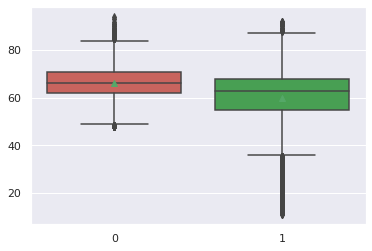

In [27]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], 
          df_over_move_at_po_wa['attacking_short_passing'],
          ],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

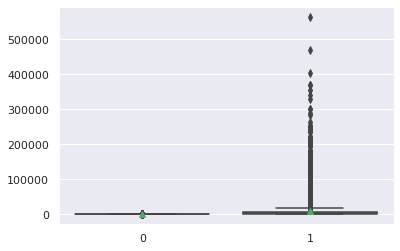

In [28]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], 
          df_over_move_at_po_wa['wage_eur'],
          ],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

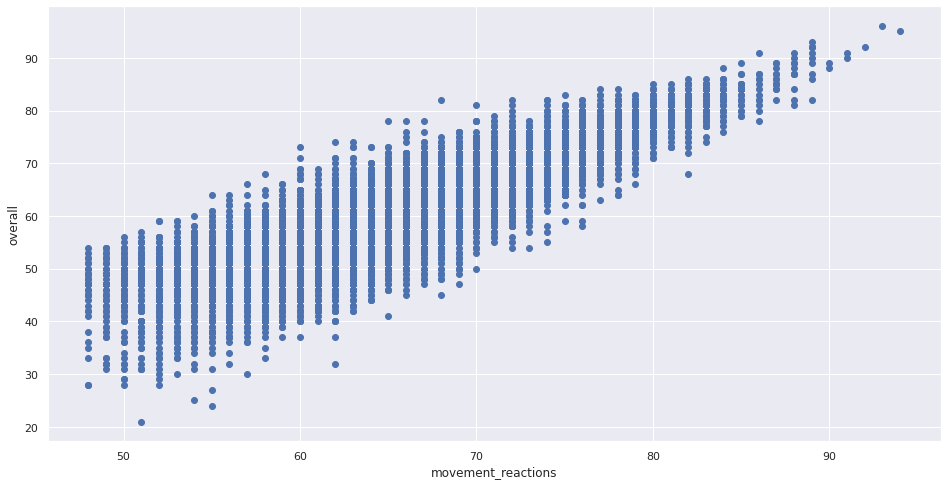

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['movement_reactions'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

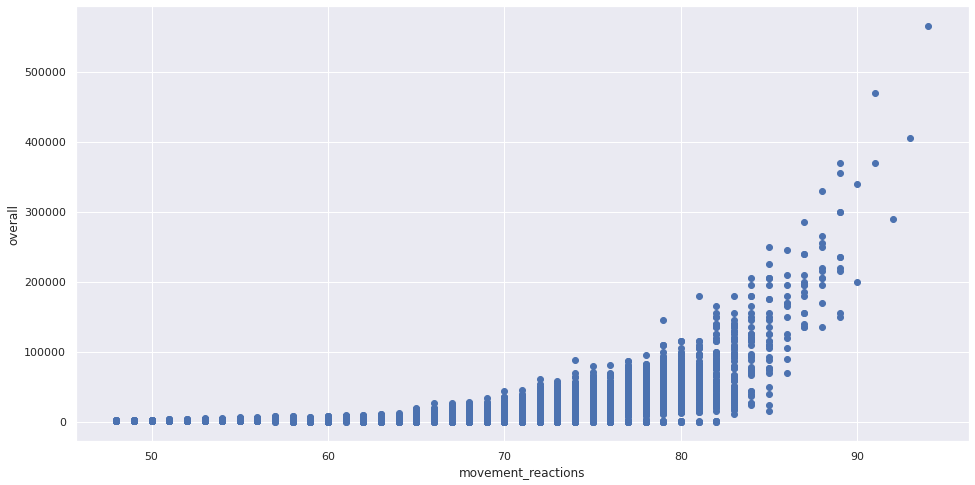

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['wage_eur'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

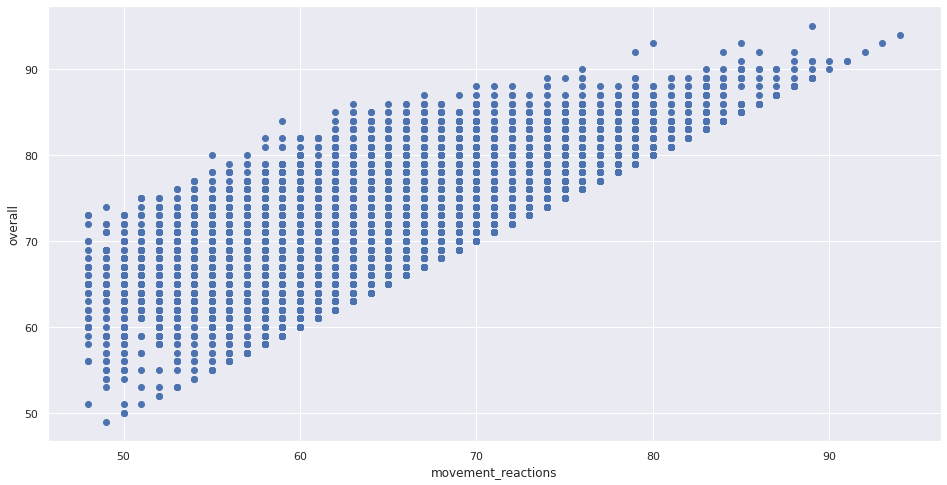

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['potential'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

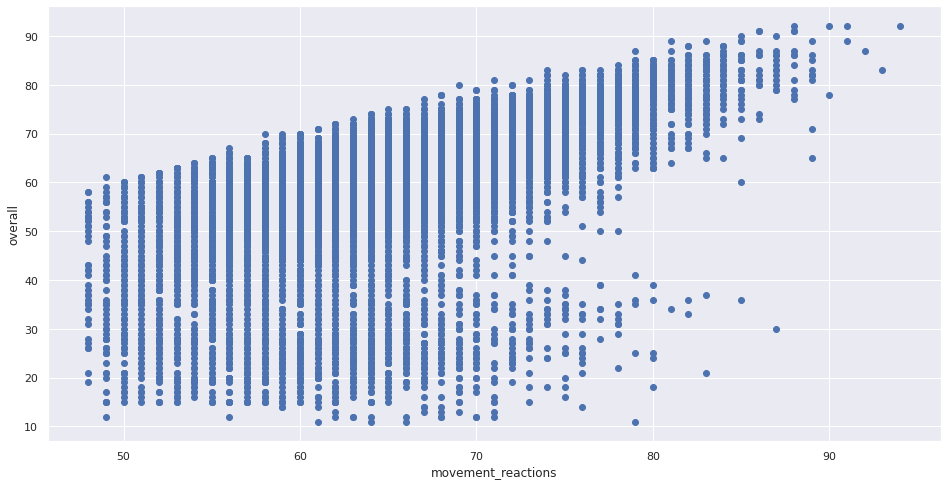

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['attacking_short_passing'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

There is quite a bit of outliers on both, but mainly for the “movement_reactions” feature. Before I consider removing any of these outliers I am going to apply DBscan clustering and isolation forest in order to see the outliers from a different perspective rather than a basic statistical plot.

In [33]:
from sklearn.cluster import DBSCAN
import random
random.seed(1)

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(df_over_move_at_po_wa)
list(clusters).count(-1)


3465

In [34]:
from sklearn.ensemble import IsolationForest
np.random.seed(1)

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(df_over_move_at_po_wa)
preds

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([-1, -1,  1, ..., -1,  1,  1])

In [35]:
unique, counts = np.unique(preds, return_counts=True)
dict(zip(unique, counts)) # Creates a count for unique predicted outliers

{-1: 3372, 1: 12482}

It is odd that DBscan indicated there are 0 outlier clusters but the isolation forest indicates there are 7130 outliers. The question now that remains is what to do with these outliers. I don't think the removal of outliers in this particular case is a good choice though because the fact that these are player values that give them are unique stats for each player and to how they perform and so of course there are going to be players who are outstanding and will create that outlier and removing these outliers means removing players and their talent just because they are good athletes. 

However, for the performance of the model, I do believe in order to predict the accuracy for the target feature "overall" it is important to do something about the outliers so it doesn't completely distort the model. So I will cap the outliers at the 5th and 95th percentile in order to replace these extreme outliers with more acceptable limits.

In [36]:
upper_lim_ov = df_over_move_at_po_wa['overall'].quantile(.95)
lower_lim_ov = df_over_move_at_po_wa['overall'].quantile(.05)
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['overall'] > upper_lim_ov),'overall'] = upper_lim_ov
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['overall'] < lower_lim_ov),'overall'] = lower_lim_ov

upper_lim_mv = df_over_move_at_po_wa['movement_reactions'].quantile(.95)
lower_lim_mv = df_over_move_at_po_wa['movement_reactions'].quantile(.05)
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['movement_reactions'] > upper_lim_mv),'movement_reactions'] = upper_lim_mv
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['movement_reactions'] < lower_lim_mv),'movement_reactions'] = lower_lim_mv

upper_lim_po = df_over_move_at_po_wa['potential'].quantile(.95)
lower_lim_po = df_over_move_at_po_wa['potential'].quantile(.05)
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['potential'] > upper_lim_po),'potential'] = upper_lim_po
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['potential'] < lower_lim_po),'potential'] = lower_lim_po

upper_lim_at = df_over_move_at_po_wa['attacking_short_passing'].quantile(.95)
lower_lim_at = df_over_move_at_po_wa['attacking_short_passing'].quantile(.05)
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['attacking_short_passing'] > upper_lim_at),'attacking_short_passing'] = upper_lim_at
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['attacking_short_passing'] < lower_lim_at),'attacking_short_passing'] = lower_lim_at

upper_lim_wa = df_over_move_at_po_wa['wage_eur'].quantile(.95)
lower_lim_wa = df_over_move_at_po_wa['wage_eur'].quantile(.05)
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['wage_eur'] > upper_lim_wa),'wage_eur'] = upper_lim_wa
df_over_move_at_po_wa.loc[(df_over_move_at_po_wa['wage_eur'] < lower_lim_wa),'wage_eur'] = lower_lim_wa

Now I am going to rerun the side by side boxplots and the isolation forest to see if this helped out with the outliers at all.

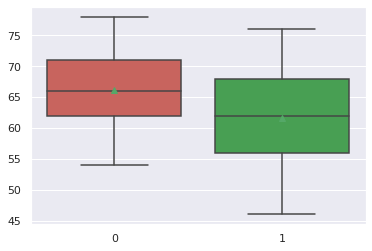

In [37]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['movement_reactions']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

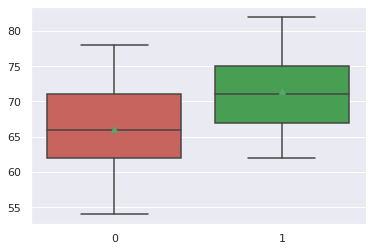

In [38]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['potential']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

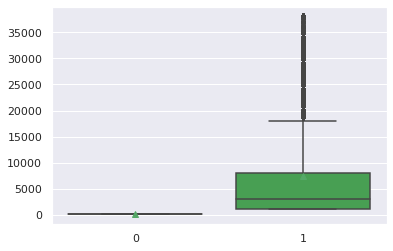

In [39]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['wage_eur']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

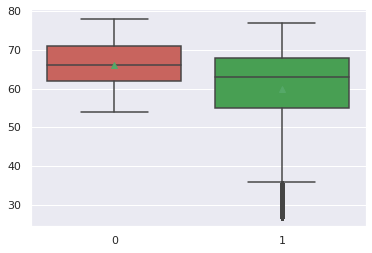

In [40]:
sns.boxplot(
    data=[df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['attacking_short_passing']],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]],
    showmeans=True,
)

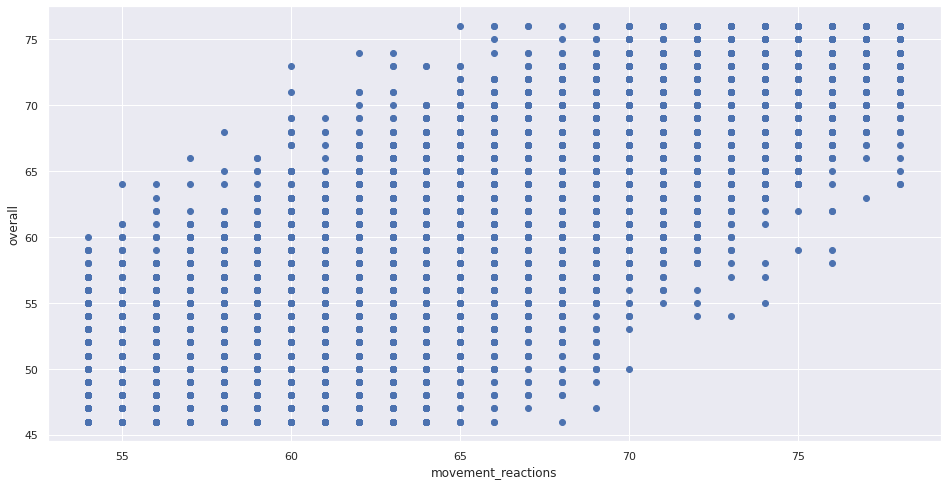

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['movement_reactions'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

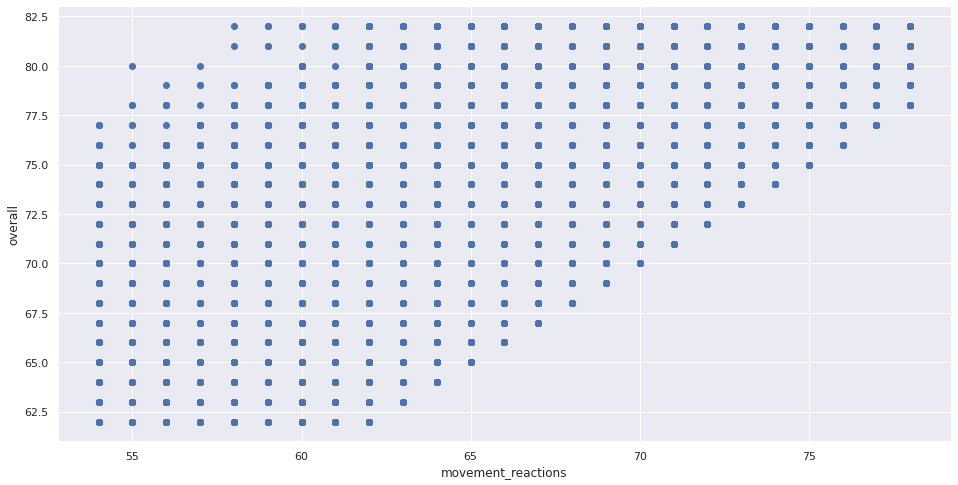

In [42]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['potential'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

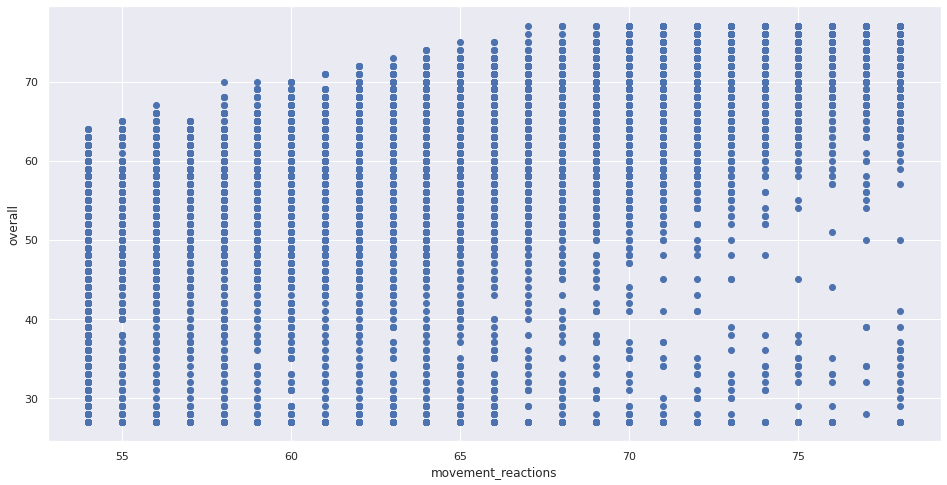

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['attacking_short_passing'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

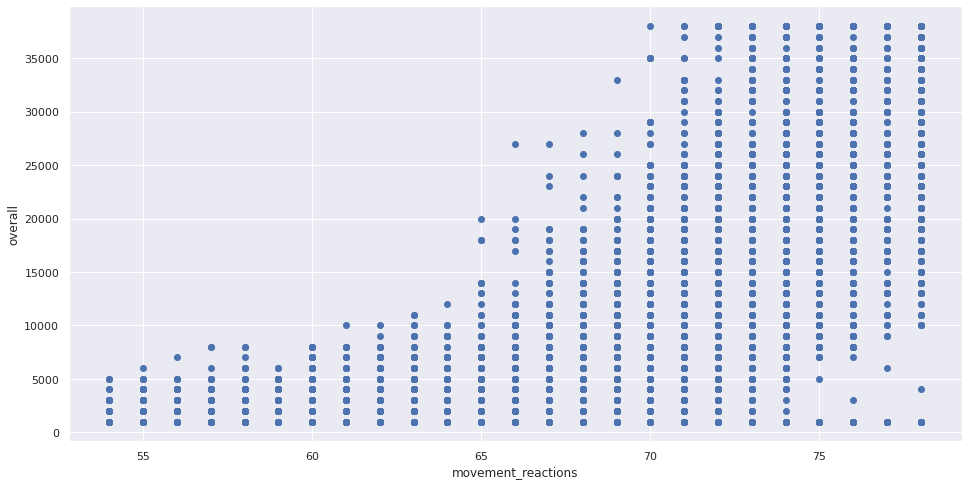

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_over_move_at_po_wa['overall'], df_over_move_at_po_wa['wage_eur'])
ax.set_xlabel('movement_reactions')
ax.set_ylabel('overall')
plt.show()

The flooring/capping of the outliers for all of these predictor variables and the target variable has made a significant improvement compared to what they were looking like before especially the features "wage_eur" and "attacking_short_passing".

Now time to build the  model.

In [45]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_cap = df_over_move_at_po_wa[["movement_reactions", "attacking_short_passing", "wage_eur", "potential"]]
y_cap = df_over_move_at_po_wa["overall"]
X_train_cap, X_test_cap, Y_train_cap, Y_test_cap = train_test_split(X_cap, y_cap, test_size=0.1, random_state= 42, shuffle=True)

# Note the difference in argument order
modelcap = sm.OLS(Y_train_cap, X_train_cap).fit()
y_predictions_cap = modelcap.predict(X_test_cap) # make the predictions by the model

# Print out the statistics
modelcap.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                overall   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.831e+06
Date:                Tue, 08 Sep 2020   Prob (F-statistic):                        0.00
Time:                        07:16:42   Log-Likelihood:                         -35565.
No. Observations:               14268   AIC:                                  7.114e+04
Df Residuals:                   14264   BIC:                                  7.117e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
movement_reactions          0.5351      0.004    133.745      0.000       0.527       0.543
attacking_short_passing     0.0469      0.002     19.536      0.000       0.042       0.052
wage_eur                 3.067e-05   2.72e-06     11.272      0.000    2.53e-05     3.6e-05
potential                   0.4194      0.003    135.105      0.000       0.413       0.425
==============================================================================
Omnibus:                       91.537   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.716
Skew:                          -0.040   Prob(JB):                     5.58e-30
Kurtosis:                       3.469   Cond. No.                     2.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Display the actual vs the predicted.
df_ols_cap = pd.DataFrame({'Actual': Y_test_cap, 'Predicted': y_predictions_cap})
print(df_ols_cap.head(10))

           Actual  Predicted
sofifa_id                   
233212       63.0  64.615725
247880       69.0  70.818055
219712       75.0  76.387037
188166       75.0  73.846108
214943       58.0  53.733543
227222       76.0  75.317347
177525       75.0  75.150737
245612       63.0  66.802003
221552       67.0  68.617138
242306       69.0  69.553306


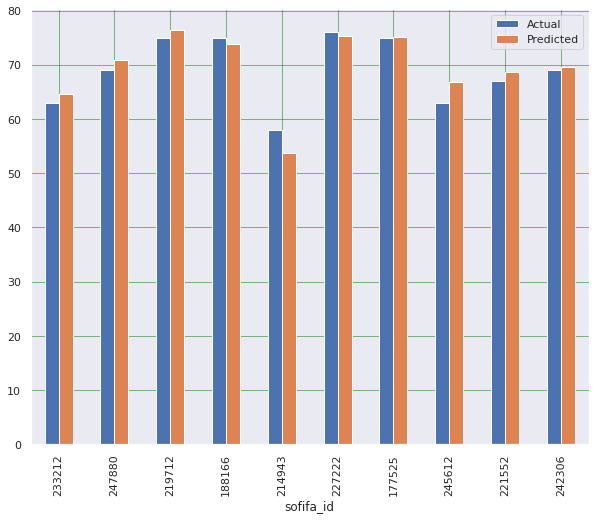

In [47]:
# Plot a bar graph to visually display the actual vs the predicted.
df_ols_head_cap = df_ols_cap.head(10)
df_ols_head_cap.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Get the model evaluation metrics and print them.
linear_mean_value = df_over_move_at_po_wa['overall'].mean()     
linear_mse = mean_squared_error(Y_test_cap, y_predictions_cap)
linear_rsme = np.sqrt(mean_squared_error(Y_test_cap, y_predictions_cap))
linear_r2_value = r2_score(Y_test_cap, y_predictions_cap)    
linear_mae = mean_absolute_error(Y_test_cap, y_predictions_cap)


print('Mean Absolute Error:', linear_mae)  
print('Mean Squared Error:', linear_mse)  
print('Root Mean Squared Error:', linear_rsme)
print("Mean Value: ", linear_mean_value)
print("R^2 Value: ", linear_r2_value)

Mean Absolute Error: 2.3113529560846184
Mean Squared Error: 8.790672935110491
Root Mean Squared Error: 2.9649069015924416
Mean Value:  66.06755392960767
R^2 Value:  0.7826758182574489


Based off of the Rsquared value, this is a good fit and those predictions are pretty close also. However, just to show that this is a better performing model because of the feature engineering I did with the outliers, I will run the OLS model again on the features without the flooring/capping  of the outliers.

In [49]:
df_over_move_no_cap = df[['sofifa_id','overall', 'movement_reactions', 'potential','wage_eur','attacking_short_passing']]
X_no_cap = df_over_move_no_cap[["movement_reactions", 'potential','wage_eur','attacking_short_passing']]
y_no_cap = df_over_move_no_cap["overall"]
X_train_no_cap, X_test_no_cap, Y_train_no_cap, Y_test_no_cap = train_test_split(X_no_cap, y_no_cap, test_size=0.1, random_state= 42, shuffle=True)

# Note the difference in argument order
model_no_cap = sm.OLS(Y_train_no_cap, X_train_no_cap).fit()
y_predictions_no_cap = model_no_cap.predict(X_test_no_cap) # make the predictions by the model

# Print out the statistics
model_no_cap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                overall   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.552e+06
Date:                Tue, 08 Sep 2020   Prob (F-statistic):                        0.00
Time:                        07:16:43   Log-Likelihood:                         -36764.
No. Observations:               14268   AIC:                                  7.354e+04
Df Residuals:                   14264   BIC:                                  7.357e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
movement_reactions          0.5268      0.004    134.184      0.000       0.519       0.534
potential                   0.4317      0.003    141.066      0.000       0.426       0.438
wage_eur                 6.041e-06   1.31e-06      4.626      0.000    3.48e-06     8.6e-06
attacking_short_passing     0.0437      0.002     18.003      0.000       0.039       0.048
==============================================================================
Omnibus:                      158.225   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.801
Skew:                          -0.151   Prob(JB):                     8.36e-48
Kurtosis:                       3.523   Cond. No.                     4.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Display the actual vs the predicted.
df_ols_no_cap = pd.DataFrame({'Actual': Y_test_no_cap, 'Predicted': y_predictions_no_cap})
print(df_ols_no_cap.head(10))

       Actual  Predicted
9489       63  64.762702
14351      69  70.812910
6264       75  75.585524
1662       75  73.044118
5674       58  50.317380
7881       76  74.610930
903        75  74.388605
13484      63  66.779737
6621       67  68.609418
12264      69  69.655484


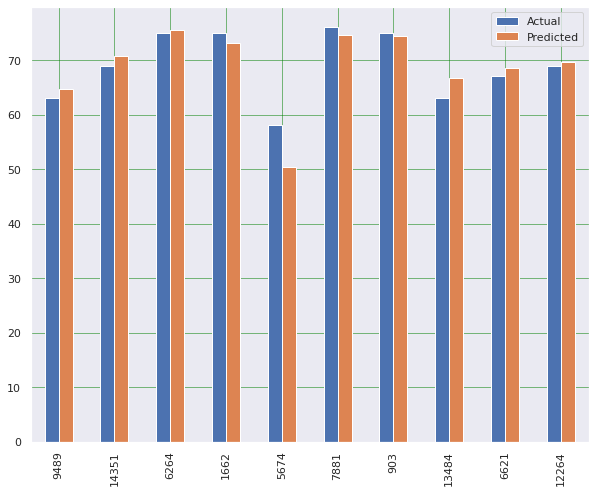

In [51]:
# Plot a bar graph to visually display the actual vs the predicted.
df_ols_head_no_cap = df_ols_no_cap.head(10)
df_ols_head_no_cap.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [52]:
# Get the model evaluation metrics and print them.
linear_mean_value = df_over_move_at_po_wa['overall'].mean()     
linear_mse = mean_squared_error(Y_test_no_cap, y_predictions_no_cap)
linear_rsme = np.sqrt(mean_squared_error(Y_test_no_cap, y_predictions_no_cap))
linear_r2_value = r2_score(Y_test_no_cap, y_predictions_no_cap)    
linear_mae = mean_absolute_error(Y_test_no_cap, y_predictions_no_cap)


print('Mean Absolute Error:', linear_mae)  
print('Mean Squared Error:', linear_mse)  
print('Root Mean Squared Error:', linear_rsme)
print("Mean Value: ", linear_mean_value)
print("R^2 Value: ", linear_r2_value)

Mean Absolute Error: 2.4918708806186527
Mean Squared Error: 10.360791892283599
Root Mean Squared Error: 3.2188184000163163
Mean Value:  66.06755392960767
R^2 Value:  0.7738533740800622


So flooring/capping the data does improve the performance of the model, but I wouldn't want to floor or cap the data more than I already have because of the fact that it defeats the purpose of using the training/testing data for an OLS model if every value has been replaced to improve performance and ruins the model integrity. 

There is high multicollinearity due to the warning indication for the condition number, but I tried this with the one variable "movement_reactions" and that was still an okay performing model, but the problem was the Rsquared was .48.

Since this was only the training/testing of the first dataset, I am going to now run this against the FIFAData_predictions now and save the predicted values into a .csv file.

In [53]:
df_pred = pd.read_excel("/content/drive/My Drive/Centurylink_project/FIFAData_predictions.xlsx")
df_pred_mov = df_pred[['sofifa_id','movement_reactions','potential','wage_eur','attacking_short_passing']]
df_pred_mov = df_pred_mov.set_index('sofifa_id')
df_pred_mov.head()

,movement_reactions,potential,wage_eur,attacking_short_passing
sofifa_id,,,,
104702,65,66,1000,68
111590,61,65,3000,61
112316,74,81,13000,74
113045,71,73,3000,59
113422,80,79,10000,76


In [54]:
X = df_pred_mov[['movement_reactions','potential','wage_eur','attacking_short_passing']]
y_pred = modelcap.predict(X)
# Display the actual vs the predicted.
df_ols_pred = pd.DataFrame({'overall': y_pred})
print(df_ols_pred.head(10))

             overall
sofifa_id           
104702     66.424299
111590     61.362707
112316     74.827847
113045     66.249806
113422     78.691244
120041     37.772429
120533     78.082946
135883     73.857471
137356     45.137518
138153     64.148531


In [55]:
df_ols_pred.to_csv('/content/drive/My Drive/Centurylink_project/FIFAData_predictions_OLS.csv')

# 3. Decision Tree

This is my first time I will be using a decision tree, and my reason for choosing it is so I can learn another model I never used before. My approach with predicting which players have "United States" as classified for their "nationality" feature will be to first explore the data and find some insight on player nationality first before creating the decision tree model. I will select the "sofifa_id","nationality", and "club" features for exploration, since the "club" feature appears  to be the  only feature that can classify the nationality of each player categorically.

In [56]:
df_nation = pd.read_excel('/content/drive/My Drive/Centurylink_project/FIFAData_90_percent_US_cat.xlsx')
df_nation = df_nation[['sofifa_id','nationality', 'club']]
df_nation.head()

,sofifa_id,nationality,club
0,101317,Not United States,SC Paderborn 07
1,101488,Not United States,FC Erzgebirge Aue
2,102064,Not United States,Spezia
3,102593,Not United States,Exeter City
4,102881,Not United States,AIK


In [57]:
df_nation_pred = pd.read_excel("/content/drive/My Drive/Centurylink_project/FIFAData_nationality.xlsx")
df_nation_pred = df_nation_pred[['sofifa_id','club']]
df_nation_pred.head()

,sofifa_id,club
0,104702,StabÃ¦k Fotball
1,111590,Blackpool
2,112316,Sporting CP
3,113045,Coquimbo Unido
4,113422,Vissel Kobe


In [58]:
df_us = df_nation.loc[df_nation['nationality'] == "United States"] 

In [59]:
df_us.head()

,sofifa_id,nationality,club
80,137267,United States,Columbus Crew SC
268,155887,United States,Toronto FC
438,164529,United States,Toronto FC
439,164559,United States,San Jose Earthquakes
441,164610,United States,Atlanta United


In [60]:
df_nation['nationality'].value_counts()

Not United States    15560
United States          294
Name: nationality, dtype: int64

In [61]:
df_nation['club'].value_counts()

Watford              32
Norwich City         32
Manchester United    31
Tottenham Hotspur    31
Parma                31
                     ..
Turkey                1
Seongnam FC           1
Austria               1
Netherlands           1
Colombia              1
Name: club, Length: 698, dtype: int64

Looking at the value_counts for all the players and the shape of the subset dataframe of that for United States players shows me that there are only 295 U.S. players in the FIFA game out of 15,854 players with only 698 club classifications to indicate if the player is from the U.S. or not. 

So now I will begin to prep the data for the decision tree by getting dummies for numerical categorization of the nationality, and transforming the club feature data in order to train the decision tree. Then I will train/test split the data to get ready for the decision tree. 

What I did below took a lot of trial and error. Since the prediction data has an input dimension of 633 labels in comparison to the main dataset which has all 698 labels this creates an input mismatch error when trying to finally predict upon the data. So I had to concatenate both datasets together to basically give the prediction dataset the same labeled features as the main dataset in order to pass it through the decision tree. 

In [63]:
from sklearn.preprocessing import OneHotEncoder
#X_dt = df_nation[['club']]
# Create the one-hot encoder object, specifying not to use sparse arrays.
m = OneHotEncoder(sparse=False)
#X_dt = m.fit_transform(X_dt)
df_concat = pd.concat([df_nation,df_nation_pred],axis=0)
df_concat =df_concat.fillna(0)
df_concat_preprocessed = m.fit_transform(df_concat[['club']])
df_concat_dummy = pd.get_dummies(df_concat['nationality'])
df_nation_pred_train = df_concat_preprocessed[:15854]
df_nation_pred_test = df_concat_preprocessed[15854:]
X_dt = df_nation_pred_train
y_dt = df_nation['nationality']
y_dt = pd.get_dummies(y_dt)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, random_state=42)

Now time to fit the decision tree with the training data in order to run the model on the predictions.

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

After fitting the model, I learned that a visual representation of the decision tree at work is sometimes good to show what is going on internally in the model.

In [65]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from pydot import graph_from_dot_data 
from IPython.display import Image 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Now to actually predict on the testing data and get the mdoel accuracy.

In [66]:
y_pred_dt = dt.predict(X_test_dt)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
nationality = np.array(y_test_dt).argmax(axis=1)
predictions = np.array(y_pred_dt).argmax(axis=1)
cm = confusion_matrix(nationality, predictions)
acc_score =accuracy_score(y_test_dt, y_pred_dt)

print("Accuracy score: ", acc_score)
print("Confusion Matrix: \n",cm)


Accuracy score:  0.9788092835519677
Confusion Matrix: 
 [[3870   16]
 [  66   12]]


This confusion matrix right here is indicating that the decision tree model is performing at 97.9% accuracy at correctly classifying the nationality of FIFA players being of United States nationality with there being 3870 true positives, 16 false positives, 66 false negatives, and 12 true negatives.

Now that the decision tree model is predicting at 97% accuracy it is  time to accruately predict the player nationalities.

In [68]:
df_nation_pred_X = df_nation_pred[['club']]
df_nation_pred_X = m.fit_transform(df_nation_pred_test)

In [69]:
y_pred_nation_dt = dt.predict(df_nation_pred_test)

In [70]:
y_pred_nation_dt

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

Since this array doesn't make anysense I am going to use np.argmax() to inverse the predictions back to their regular categorical factors so I can manipulate the dataset in a spreadsheet afterwards.

In [71]:
print(y_pred_nation_dt)
print(np.argmax(y_pred_nation_dt, axis=1))
pred_list = np.argmax(y_pred_nation_dt, axis=1)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [0 1]]
[0 0 0 ... 0 0 1]


In [72]:
pred_list = pred_list.tolist()

In [73]:
df_nation_pred['nationality'] = pred_list

In [74]:
df_nation_pred.tail()

,sofifa_id,club,nationality
1757,50542,Rangers FC,0
1758,53073,SV Sandhausen,0
1759,54008,Burton Albion,0
1760,54013,Blackburn Rovers,0
1761,54050,DC United,1


In [75]:
df_nation_pred.to_csv('/content/drive/My Drive/Centurylink_project/FIFAData_nationality_prediction.csv')